# How to classify or predict anything using APIs

## File Information

### Description 
A python script to predict retail store performance based on data pulled from the Google Places API. This script was used to count the number of different local landmarks (supermarkets, liquor stores, gyms, schools, churches, bus stops, etc) around each store, to explore if the success of a retail store could be predicted based on these local places. This script also accepts keyword inputs, so that you can count the number of __specific__ places (ie, search for "Walgreens" instead of just "pharmacies").

The default script takes a list of geocoordinates, one set for each sample you wish to classify. Simply enter the names of the Google Places you wish to count, and a list of radii to search within, and the script will pull and count a list of these places for each store. Because this is a supervised learning script, target classes will need to be given in order to classify the sample stores. 

<div class='alert alert-warning'>
This script can be used in conjunction with my Census and Yelp API scripts (www.github.com/marklabinski) in order to use  Google, Yelp and Census data as feature inputs in a machine learning experiment. Combine these with my neural network scripts to create one amazing research project!
</div>

Examples of potential uses:
 
> - Retail : Classify McDonalds locations by success (top 25%, top 50%, bottom 50%, bottom 25%) based on the number of Burger King's, Taco Bell's, schools, bus stops, malls, etc. within a 1, 3, 5, and 10 mile radius. New potential locations can then be given to the algorithm to predict best locations to open a new store.
> - Real estate : Predict "on the rise" neighborhoods based on the number of Starbucks opened within the last year, the number of transplants within the past 3 years, median age, the income price over the past 2 years, etc.
> - Social sciences : Find correlations between lower-performing schools and their immediate surroundings.
> - The possibilities are limitless and this script generalizes to __ANYTHING__ - get creative!

Note: The default script here takes in a dataset with confidential information, but can be changed by simply creating a new pandas dataframe to read all the data into (this will be noted below in the script). In order to bypass the Google API limit, a premium API key must be purchased. 
>> For automated, command-line scripts or for scalable software version, email me at marklabinski@gmail.com.


Requirements:
 urllib, json, requests, pandas, seaborn, matplotlib, numpy, scikit-learn

In [2]:
import urllib, json, requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

ImportError: No module named 'requests'

#### Functions to pull data from Google Places API

In [2]:
# Grabbing and parsing JSON data
"""
Input : latitude, longitude, radius (miles), 
Output : Grabs JSON object from Google, turns it into nested array
"""
def GooglePlace(lat,lng,radius,types,key):
    #making the url
    AUTH_KEY = key
    LOCATION = str(lat) + "," + str(lng)
    RADIUS = radius * 1609.344 # convert to meters (Google requirement)
    TYPES = types
    googUrl = ('https://maps.googleapis.com/maps/api/place/nearbysearch/json'
           '?location=%s'
           '&radius=%s'
           '&types=%s'
           '&sensor=false&key=%s') % (LOCATION, RADIUS, TYPES, AUTH_KEY)
    #grabbing JSON result
    response = requests.get(googUrl)
    jsonData = response.json()
    return jsonData

#### Adding to pre-exisiting dataset

If you are adding Google Places data to an existing dataset, read in the file here. This will create a pandas dataframe for the file. Otherwise, skip to next cell.

In [5]:
root = 'C:/Users/markl/OneDrive/Documents/GG/'
fn = 'goody_data.xlsx'
data = pd.read_excel(root+fn)
data.head()

,store,sBeerD1,sBeerD3,sBeerD5,sWineD1,sWineD3,sWineD5,sLiqD1,sLiqD3,sLiqD5,...,gas1,liqstore3,totalwine3,specs3,liqstore5,totalwine5,specs5,totalwine10,specs10,class
0,6,185574006,524159838,518392344,103985733,563653484,473880898,357771952,1210454254,904914035,...,12,20,0,1,20,1,4,1,6,0
1,14,9176999,7466048,36629713,889407,913490,11605723,8457666,7452384,45468136,...,14,4,0,0,9,1,1,2,4,0
2,18,27270345,72497984,183299076,9050697,30096549,65283694,29796197,84063663,243360994,...,8,13,1,2,20,1,2,1,0,0
3,20,5354803,36128378,16867014,69960,7023970,4241312,5555491,51959284,18234813,...,8,17,2,0,20,1,0,3,0,0
4,21,3721988,34764388,13398402,1038888,3205074,6373324,6219703,44693191,18607705,...,12,17,2,0,20,2,0,2,0,0


#### Creating a new dataset

To create a new dataset using Google Places data, simply create a pandas dataframe to store data.

In [1]:
data = pd.DataFrame()

NameError: name 'pd' is not defined

#### Pull data from Google API 

Here we are going to pull the places count within a 1, 3, 5 and 10 mile radius of each store or locatin of interest. To set new Google types, simply change the names in google_types_keyword. Follow the format found in https://developers.google.com/places/web-service/search. You can then change the names in new_columns_keyword, which will be the new column names in your new dataset.

In [13]:
# API key
MyKey = 'xxxxx'


# Google types to use
google_types_keyword = ['liquor_store','liquor_store&keyword=Total Wine' ,'liquor_store&keyword=Spec','convenience_store','gas_station']

# Names for new columns
new_columns_keyword = ['liqstore','totalwine','specs','convenience','gas']

# Set search radius
rad = [1,3,5,10]

# Initialize search 
search = {}

# Loop through all google types
for r in range(len(rad)):
    for idx in range(len(google_types_keyword)):
        data[new_columns_keyword[idx]+str(rad[r])]=0  
        for row in data.iterrows():    # Loop through test stores
            index,data = row
            search[index] = GooglePlace(lat=data['lat'],lng=data['lng'],radius=rad[r],types=google_types_keyword[idx],key=MyKey)
            data.loc[index,[new_columns_keyword[idx]+str(rad[r])]] = len(search[index]['results'])

#### Look at descriptive statistics

Let's group by our target variable, class, and look at some descriptive statistics to explore the dataset.

In [8]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]
grouped_data = data.groupby(['class'])

for var in list(data.iloc[:,1:-1].columns):
    print(var, grouped_data[var].describe())

(u'sBeerD1',        count          mean           std        min        25%         50%  \
class                                                                        
0       11.0  2.543632e+07  5.364713e+07   151673.0  4538395.5  10322864.0   
1       11.0  7.533419e+07  1.001935e+08  3331853.0  6097762.0  13667425.0   

               75%          max  
class                            
0       12990751.5  185574006.0  
1      139965116.0  256498373.0  )
(u'sBeerD3',        count          mean           std        min         25%         50%  \
class                                                                         
0       11.0  8.008615e+07  1.495843e+08   569602.0  18669137.0  36128378.0   
1       11.0  1.255465e+08  2.012268e+08  5417405.0  35580093.5  53115508.0   

               75%          max  
class                            
0       60072644.5  524159838.0  
1      115467730.5  716624383.0  )
(u'sBeerD5',        count          mean           std        min      

(u'aLiqD5',        count          mean          std          min           25%  \
class                                                                
0       11.0  10810.888235  5606.127838  1294.843137   7797.702723   
1       11.0  13978.363139  4814.582406  6618.601146  10688.626070   

                50%           75%           max  
class                                            
0       9446.942863  13744.004765  23073.358193  
1      13473.322063  16984.041169  22021.915777  )
(u'aCoverD1',        count       mean        std      min       25%        50%        75%  \
class                                                                         
0       11.0  17.717148  22.158651  0.00000  0.454470   4.545454  32.657513   
1       11.0  57.062484  86.329394  0.09009  5.259731  18.391683  52.178399   

              max  
class              
0       65.118770  
1      268.231401  )
(u'aCoverD3',        count       mean         std       min       25%        50%        75%  \

#### Find important features using KBest

Compare performance of different feature selection methods

In [63]:
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

x_varth = VarianceThreshold(.7).fit_transform(X)

x_kbest = SelectKBest(f_classif, k=2).fit_transform(X,y)

print(cross_val_score(LogisticRegression(), X, y, scoring='neg_log_loss').mean())

print(cross_val_score(LogisticRegression(), x_varth, y, scoring='neg_log_loss').mean())

print(cross_val_score(LogisticRegression(), x_kbest, y, scoring='neg_log_loss').mean())

 -18.684012496162747
-18.915122435070057
-0.6463375123236821


#### Try different classification techniques

In [110]:
# Try different classification techniques 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

clf_A = LogisticRegression(random_state=0)
clf_B = GaussianNB()
clf_C = DecisionTreeClassifier(random_state=1)
clf_D = GradientBoostingClassifier(random_state=1)
clf_E = RandomForestClassifier(random_state=1)

clf_list = [clf_A, clf_B, clf_C, clf_D, clf_E]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 10,
                                                    stratify = y)

for clf in clf_list:
    clf.fit(X_train,list(y_train.values))
    y_pred = clf.predict(X_test)
    print(clf)
    print 'Accuracy: ',clf.score(X_test,list(y_test.values))
    print 'Precision: ',precision_score(list(y_test.values),y_pred) 
    print 'Recall: ',recall_score(list(y_test.values),y_pred) 
    print 'F1 Score: ',f1_score(list(y_test.values),y_pred) 
    print 'Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred)
    print ' ' 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy:  0.4
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
Confusion Matrix: 
[[2 0]
 [3 0]]
 
GaussianNB(priors=None)
Accuracy:  0.6
Precision:  0.6666666666666666
Recall:  0.6666666666666666
F1 Score:  0.6666666666666666
Confusion Matrix: 
[[1 1]
 [1 2]]
 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
Accuracy:  0.4
Precision:  0.5
Recall:  0.3333333333333333
F1 Score:  0.4
Confusion Matrix: 
[[1 1]
 [2 1]]
 
GradientBoostingClassi

#### Draw ROC curves

<IPython.core.display.Javascript object>


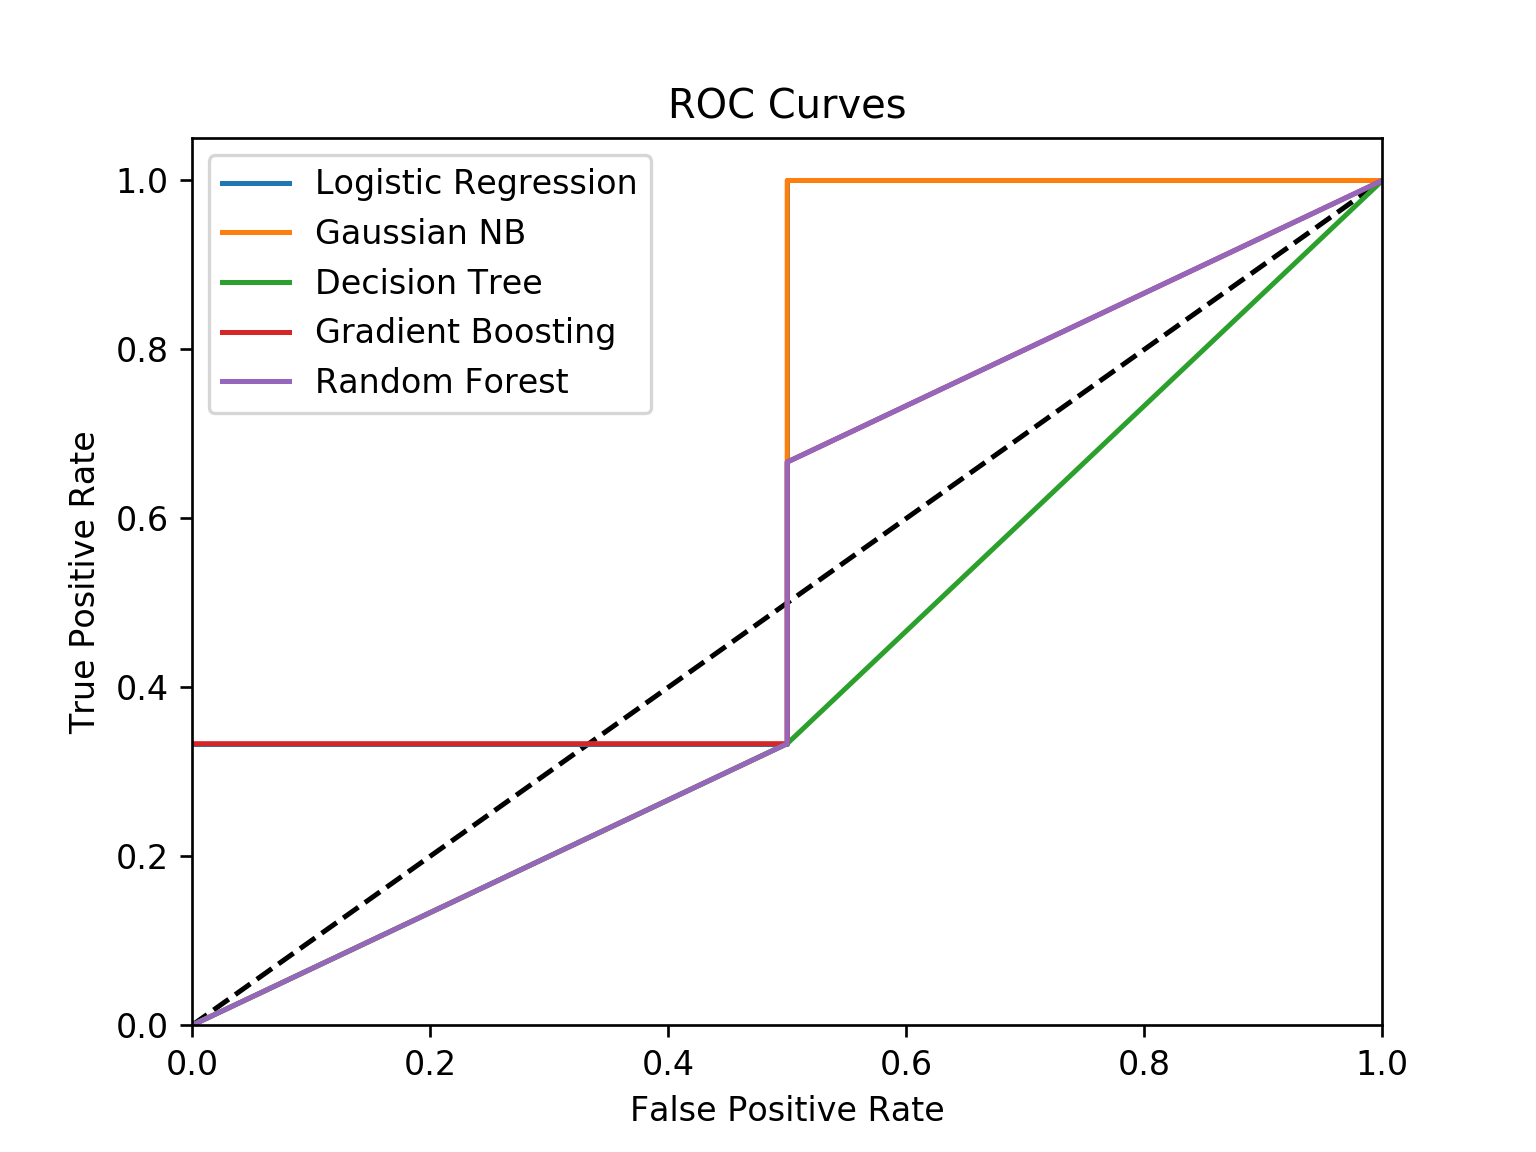

In [89]:
y_score_A=  clf_A.decision_function(X_test)
y_score_B = clf_B.predict_proba(X_test)[:,1]
y_score_C = clf_C.predict_proba(X_test)[:,1]
y_score_D = clf_D.decision_function(X_test)
y_score_E = clf_E.predict_proba(X_test)[:,1]

fpr_A, tpr_A, _ = roc_curve(y_test.values,y_score_A)
fpr_B, tpr_B, _ = roc_curve(y_test.values,y_score_B)
fpr_C, tpr_C, _ = roc_curve(y_test.values,y_score_C)
fpr_D, tpr_D, _ = roc_curve(y_test.values,y_score_D)
fpr_E, tpr_E, _ = roc_curve(y_test.values,y_score_E)

plt.plot([0,1],[0,1],'k--')

plt.plot(fpr_A,tpr_A,label='Logistic Regression')
plt.plot(fpr_B,tpr_B,label='Gaussian NB')
plt.plot(fpr_C,tpr_C,label='Decision Tree')
plt.plot(fpr_D,tpr_D,label='Gradient Boosting')
plt.plot(fpr_E,tpr_E,label='Random Forest')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

#### Rank features in terms of importance

In [114]:
importances = clf_E.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_E.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
important = importances[indices[f] > 0.0]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    if importances[indices[f]] > 0.0:
        print("%d. feature: %s (%f)" % (f + 1, X.iloc[:,indices[f]].name, importances[indices[f]]))

Feature ranking:
1. feature: BizD5 (0.151735)
2. feature: convenience1 (0.135210)
3. feature: aWineD5 (0.116104)
4. feature: sCoverD1 (0.079404)
5. feature: aBeerD3 (0.062425)
6. feature: sCoverD3 (0.056265)
7. feature: pop3 (0.048485)
8. feature: aLiqD5 (0.047310)
9. feature: aLiqD1 (0.034630)
10. feature: aLiqD3 (0.032786)
11. feature: pop5 (0.032197)
12. feature: specs5 (0.030612)
13. feature: aWineD10 (0.022896)
14. feature: aBeerD5 (0.022896)
15. feature: pop1 (0.021587)
16. feature: aCoverD3 (0.020816)
17. feature: liqstore3 (0.019318)
18. feature: sLiqD5 (0.016190)
19. feature: liqstore5 (0.015741)
20. feature: sWineD1 (0.012143)
21. feature: aCoverD1 (0.012143)
22. feature: sliqstoreD5 (0.009107)
